In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


### EDA

In [2]:
data = pd.read_csv('../data/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.size

1000

### Outlier handling

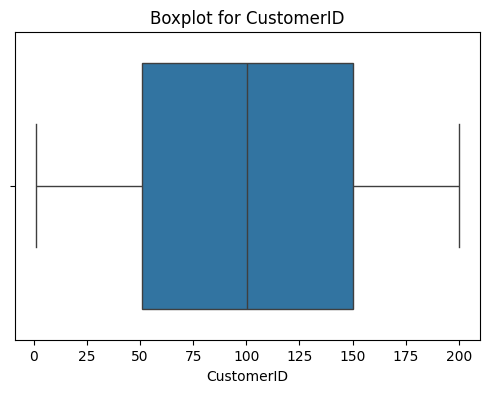

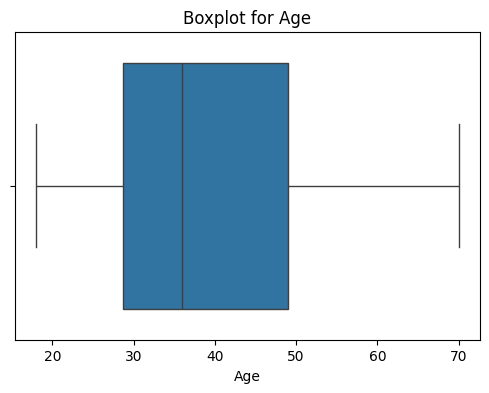

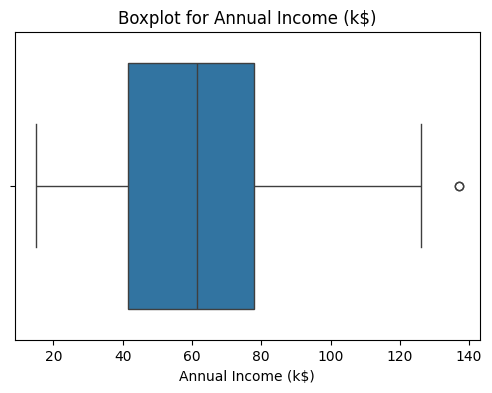

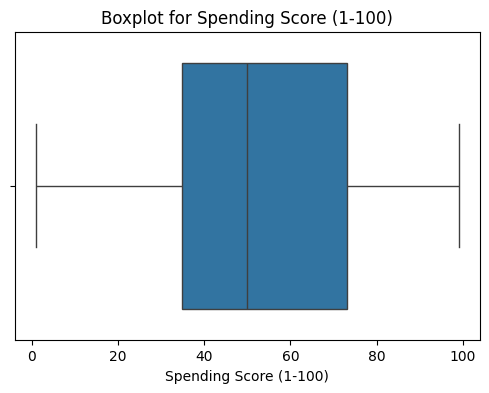

In [11]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [12]:
def handle_outliers_clip(data):
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)    
    return data

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                15.0                      39
1           2    Male   21                15.0                      81
2           3  Female   20                16.0                       6
3           4  Female   23                16.0                      77
4           5  Female   31                17.0                      40


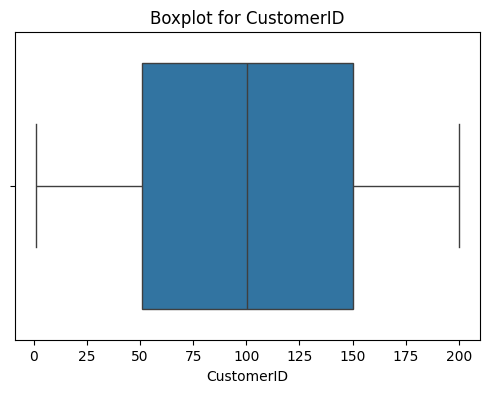

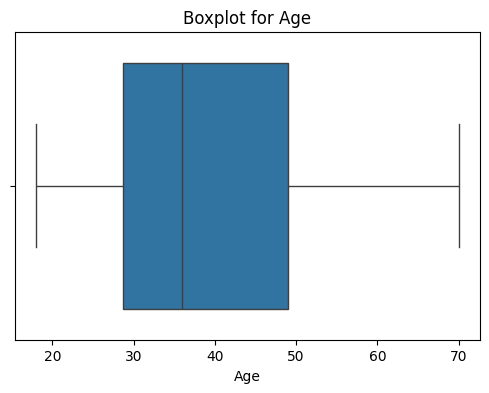

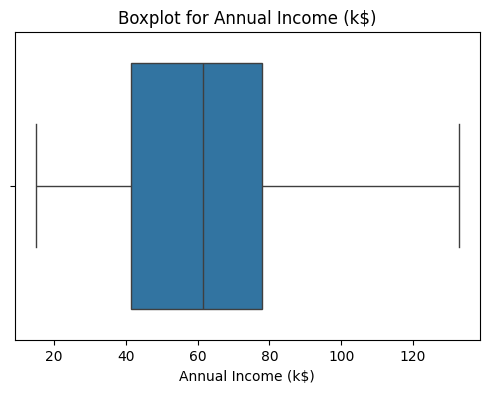

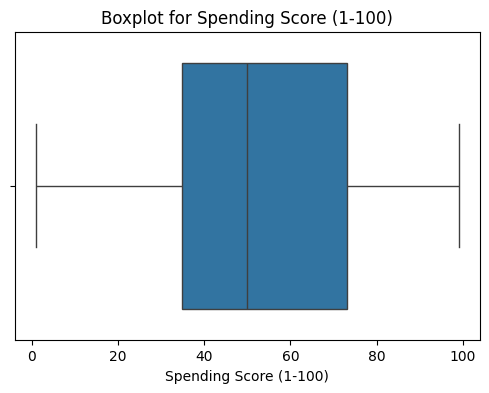

In [13]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [3]:
X = data.drop('CustomerID',axis=1)
X = pd.get_dummies(X).astype(int)
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


### K-Means

In [15]:
### Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is the sum of diff between centroid and corrsponding datapoint
    print('k:',i," wcss:",kmeans.inertia_)

k: 1  wcss: 308911.34
k: 2  wcss: 212938.71508951404
k: 3  wcss: 143440.43314900764
k: 4  wcss: 104463.19922884133
k: 5  wcss: 75448.45165554191
k: 6  wcss: 58396.83940503942
k: 7  wcss: 51213.38152958153
k: 8  wcss: 44437.297953697955
k: 9  wcss: 40718.61445260166
k: 10  wcss: 37249.381961907835


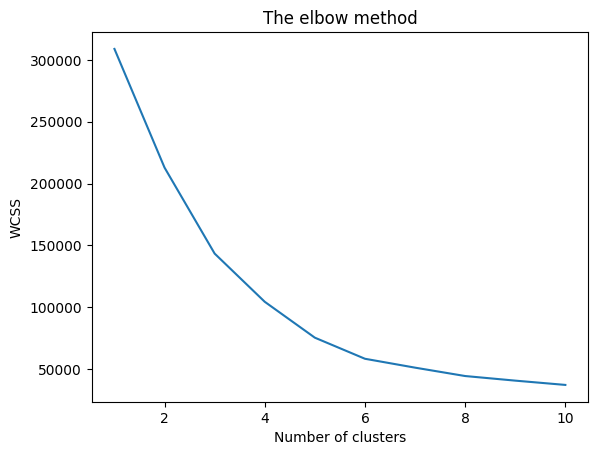

In [17]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
Y = kmeans.fit_predict(X)
Y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [45]:
data['Cluster'] = Y
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15.0,39,2
1,2,Male,21,15.0,81,2
2,3,Female,20,16.0,6,2
3,4,Female,23,16.0,77,2
4,5,Female,31,17.0,40,2


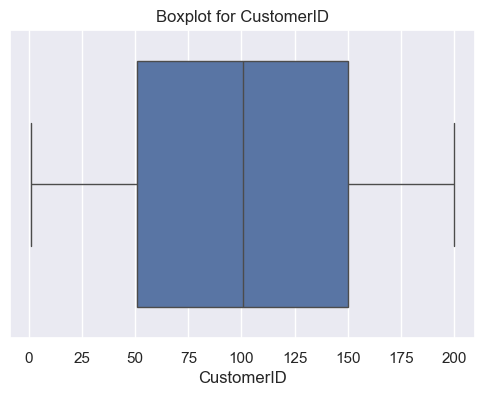

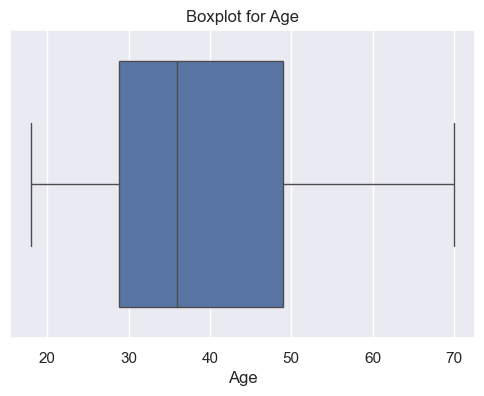

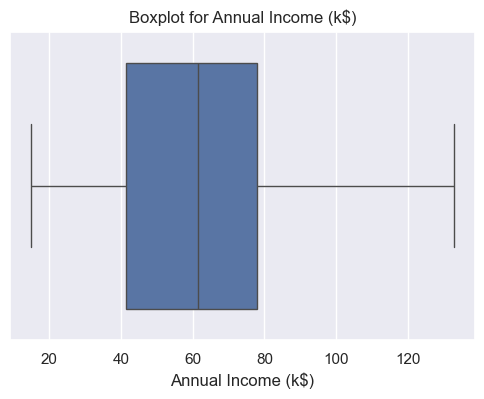

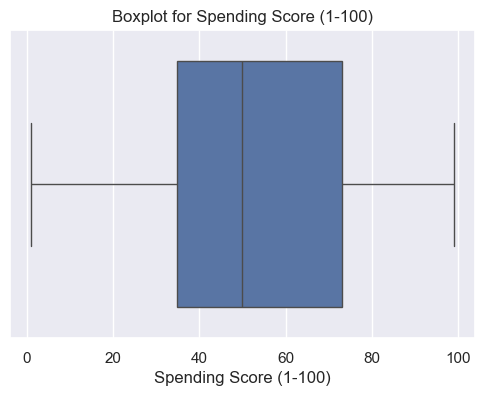

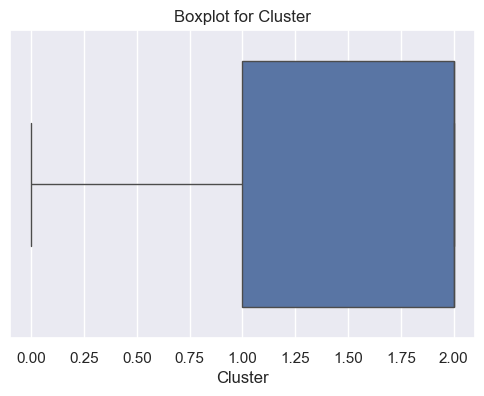

In [51]:
# checking if outliers in cluster column
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Plotting

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

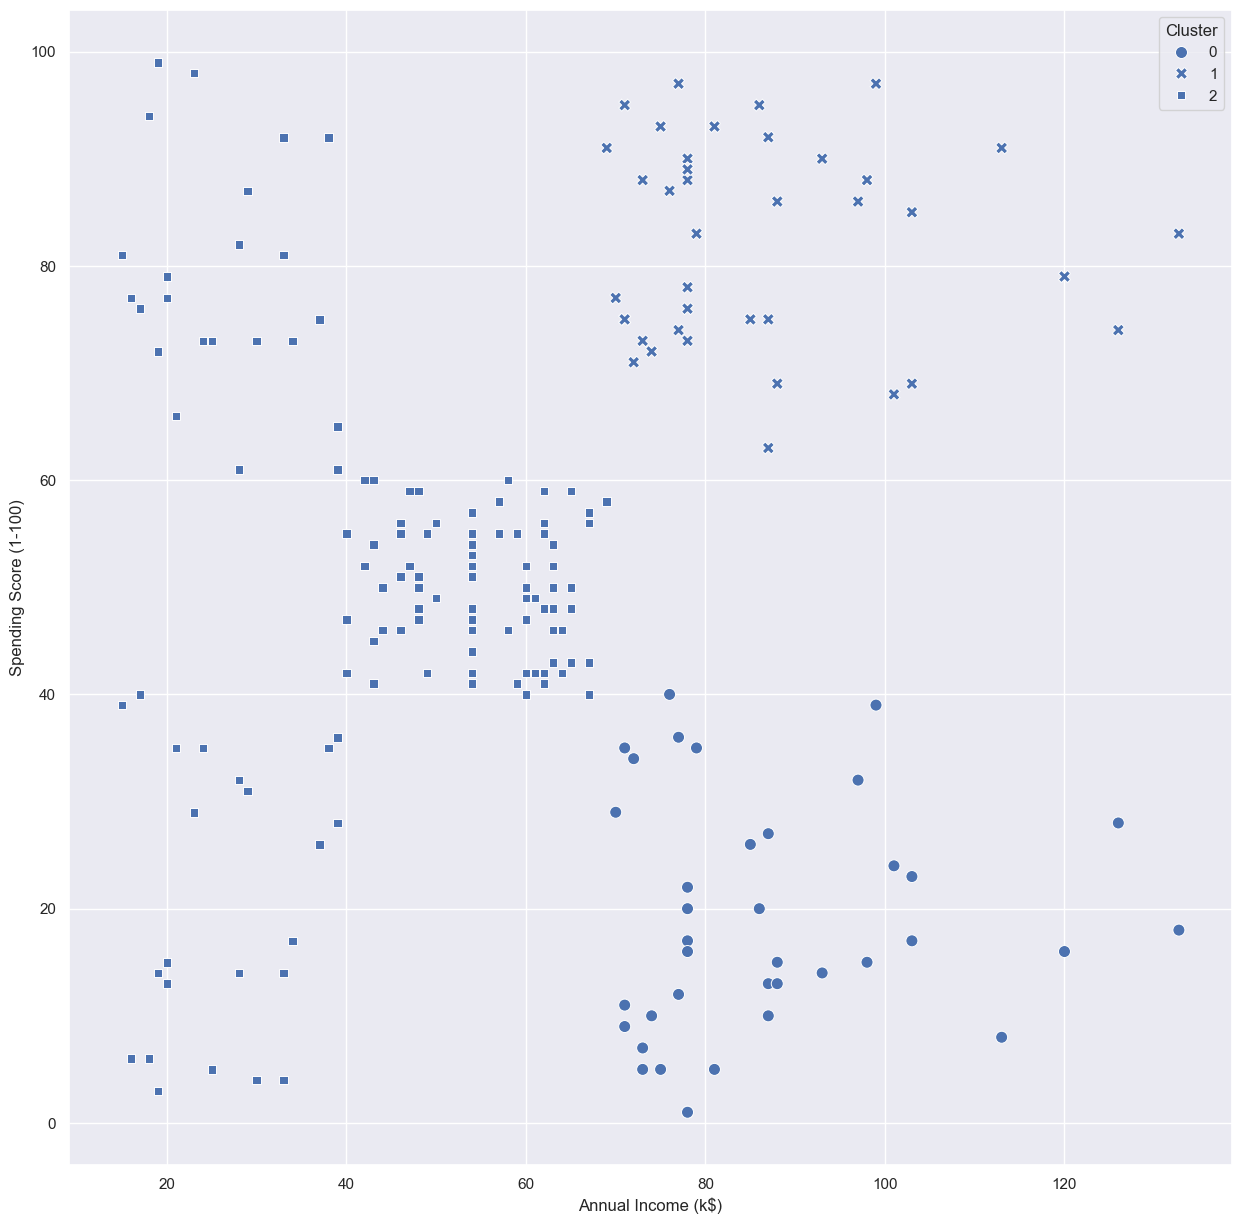

In [46]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)",style='Cluster',s=75)

### Splitting data

In [47]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

### Modeling

In [48]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 100.00%
Logistic Regression Accuracy: 95.00%
SVM Accuracy: 95.00%
KNN Accuracy: 95.00%
Naive Bayes Accuracy: 95.00%
Decision Tree Accuracy: 100.00%
AdaBoost Accuracy: 97.50%
Gradient Boosting Accuracy: 100.00%
XGBoost Accuracy: 100.00%


In [49]:
#END